**CONSUMER BEHAVIOUR PREDICTION AND LOYALTY ANALYTICS THROUGH SEGMENTATION-ONLINE RETAIL**

**Introduction**
As per Research, it has been found that the cost of acquiring new customers is five times higher than retaining current ones. Additionally, existing customers demonstrate a greater propensity to invest in new products from a company compared to new customers. This underscores the importance of fostering customer loyalty. Loyal customers tend to dedicate more time and money to the brands they trust and often advocate for them among their social circles, contributing to referral traffic and word-of-mouth marketing. Customer loyalty not only aids in predicting customer behavior but also plays a crucial role in shaping a brand's image. As businesses increasingly prioritize strong customer relationship management (CRM), they endeavor to cultivate enduring relationships with their existing customer base to enhance customer loyalty and brand loyalty alike.

**Problem Statement**
Customer relationship management represents a critical managerial endeavor within organizations, often accompanied by the adoption of target marketing strategies. However, the effective utilization of CRM data and the selection of appropriate analytics techniques pose significant challenges. This project aims to address these challenges by analyzing customer data, segmenting customers to identify profitable segments, such as loyal customers, and predicting their future purchasing behavior. The overarching objective is to develop a customer-centric strategy by leveraging data-driven insights derived from CRM processes.

**Datasets**


1.   Online Retail
2.   Final_Customers

**Datasets Generated from the analysis**

Customers-Categorized groups from RFM Analysis

Merged_Dataframe

Selected_Customers




**Steps Performed in Analysis**


*   Customer Analytics and Loyalty Prediction using RFM Model-Categorization of Customers based on Recency, Frequency and Monetary variables created.
*   Creating a word cloud by employing clustering technique to product descriptions
*   Defining features like Basket Price, days from last purchase and days from first purchase for each customer Id
*   Employed Clustering to categorize customers into different clusters based on above variables.
* Training of a supervised machine learning model to predict customer
clusters based on selected features. Common algorithms for this task include logistic regression, decision trees, random forests, support vector machines, and k-nearest neighbors, facilitating customer segmentation, targeted marketing campaigns, and various business applications.










**DATA DESCRIPTION**
This is a transactional data set which contains all the transactions history for an online
retail store. The company mainly sells unique all-occasion gifts. Many customers of the
company are wholesalersi.e. they purchase in huge quantities.
The dataset has major attributes as:

1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to
each transaction. If this code starts with letter 'c', it indicates a cancellation.

2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely
assigned to each distinct product.

3. Description: Product (item) name. Nominal.

4. Quantity: The quantities of each product (item) per transaction. Numeric.

5. InvoiceDate: Invoice Date and time. Numeric, the day and time when each
transaction was generated.

6. UnitPrice: Unit price. Numeric, Product price per unit in sterling.

7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely
assigned to each customer.

8. Country: Country name. Nominal, the name of the country where each customer
resides.


**MACHINE LEARNING TECHNIQUES**

**KMeans**-Clustering for Customer segmentation, defining customer groups and word cloud generation

**Principal Component Analysis** to transform matrix which
contains the information of product categories defined using clustering

**KNN, Decision Trees, Gradient Boosting, Random Forest, SVM to train the model.**


In [1]:
pip install squarify

In [2]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

data = pd.read_excel(
    "/content/Online Retail.xlsx",
    sheet_name="Online Retail",
    engine="openpyxl",
    keep_default_na=False,
    na_values=["#REF!", "#N/A", "#NA", "NULL"],
)

In [4]:
dfr = data

In [5]:
dfr.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
dfr.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [8]:
dfr.shape

(541909, 8)

In [9]:
dfr.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


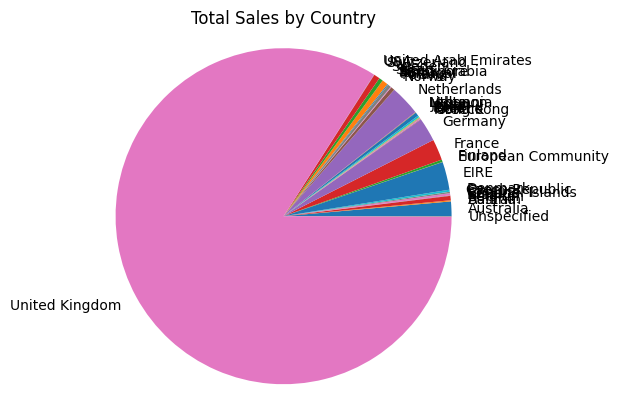

In [10]:
dfr['TotalPrice'] = dfr['Quantity'] * dfr['UnitPrice']
country_sales = dfr.groupby('Country')['TotalPrice'].sum().reset_index()
plt.pie(country_sales['TotalPrice'], labels=country_sales['Country'])
plt.axis('equal')
plt.title('Total Sales by Country')
plt.show()

Data Cleaning and Preprocessing

In [11]:
#Eliminating the null values from the dataset
dfr = dfr.dropna()

In [12]:
#Eliminating the duplicates
dfr.drop_duplicates(keep='first', inplace=True)

In [15]:
dfr.shape

(536641, 9)

In [13]:
#ret stands for retail
ret = dfr.copy()

**STEP 1**

**Building an RFM model of customer segmentation**The RFM Segmentation Model is a method used by marketers to categorize customers based on their purchasing behavior, aiming to target specific clusters more effectively. RFM stands for Recency, Frequency, and Monetary Value:

**Recency (R)**: Refers to the number of days since a customer's last purchase. This metric helps identify how recently a customer has engaged with the business, indicating their level of activity and potential interest.
  
**Frequency (F)**: Represents the total number of purchases made by a customer within a specific period. This metric gauges how often a customer buys from the business, indicating their loyalty and engagement.

**Monetary Value (M)**: Reflects the total amount of money spent by a
customer over a certain period. This metric provides insights into a customer's spending habits and their potential value to the business.

By analyzing these three key factors together, marketers can segment customers into different groups based on their RFM scores. This segmentation allows for targeted marketing efforts tailored to each group's specific behavior, resulting in higher response rates, increased customer loyalty, and enhanced customer lifetime value.

To calculate the total monetary value of each customer's sales by aggregating the monetary value of each sale made by the customer. The resulting DataFrame ret_mv contains the customer ID, total monetary value

1) Monetary

In [16]:
ret['MonetaryValue'] = ret['Quantity'] * ret['UnitPrice']
ret_mv = ret.groupby(['CustomerID']).agg({'MonetaryValue': sum}).reset_index()
ret_mv.head(5)


,CustomerID,MonetaryValue
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


2) Frequency

In [17]:
ret_f = ret.groupby('CustomerID')['InvoiceNo'].count()
ret_f = ret_f.reset_index()
ret_f.head(5)

,CustomerID,InvoiceNo
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


3) Recency

In [18]:
#Steps to define the recency of purchase
ret_mvf = pd.merge(ret_mv, ret_f, on='CustomerID', how='inner')
ret['InvoiceDate'] = pd.to_datetime(ret['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date = max(ret['InvoiceDate'])
ret['Diff'] = max_date - ret['InvoiceDate']

In [19]:
ret_r = ret.groupby('CustomerID')['Diff'].min()
ret_r = ret_r.reset_index()
ret_r['Diff'] = ret_r['Diff'].dt.days

In [20]:
ret_rfm = pd.merge(ret_mvf, ret_r, on='CustomerID', how='inner')
ret_rfm.columns = ['CustomerID', 'MonetaryValue', 'Frequency', 'Recency']

In [21]:
cols = ['CustomerID', 'Recency', 'Frequency', 'MonetaryValue']
ret_rfm = ret_rfm[cols]

In [22]:
r_labels = range(4, 0, -1)
r_groups = pd.qcut(ret_rfm.Recency, q = 4, labels = r_labels)

In [23]:
f_labels = range(1, 5)
f_groups = pd.qcut(ret_rfm.Frequency, q = 4, labels = f_labels)
m_labels = range(1, 5)

In [24]:
m_groups = pd.qcut(ret_rfm.MonetaryValue, q = 4, labels = m_labels)

In [25]:
ret_rfm['R'] = r_groups.values
ret_rfm['F'] = f_groups.values
ret_rfm['M'] = m_groups.values
ret_rfm['RFM_Segment'] = ret_rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
ret_rfm['RFM_Score'] = ret_rfm[['R', 'F', 'M']].sum(axis = 1)

In [44]:
#Segment Descriptions for the tree chart
segment_dict = {
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Potential Loyalists':'434', # High recency and monetary value, average frequency
    'Big Spenders':'334',        # High monetary value but good recency and frequency values
    'At Risk Customers':'244',   # Customer's shopping less often now who used to shop a lot
    'Can’t Lose Them':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}

In [45]:
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))

In [46]:
ret_rfm['Segment'] = ret_rfm.RFM_Segment.map(lambda x: dict_segment.get(x))
ret_rfm.Segment.fillna('others', inplace=True)

In [47]:
ret_rfm_segments = ret_rfm[ret_rfm.Segment!='other'].groupby('Segment')['CustomerID'].count().reset_index(name='counts')

In [48]:
segment = list(ret_rfm_segments.iloc[:8].Segment)
score = list(ret_rfm_segments.iloc[:8].counts)

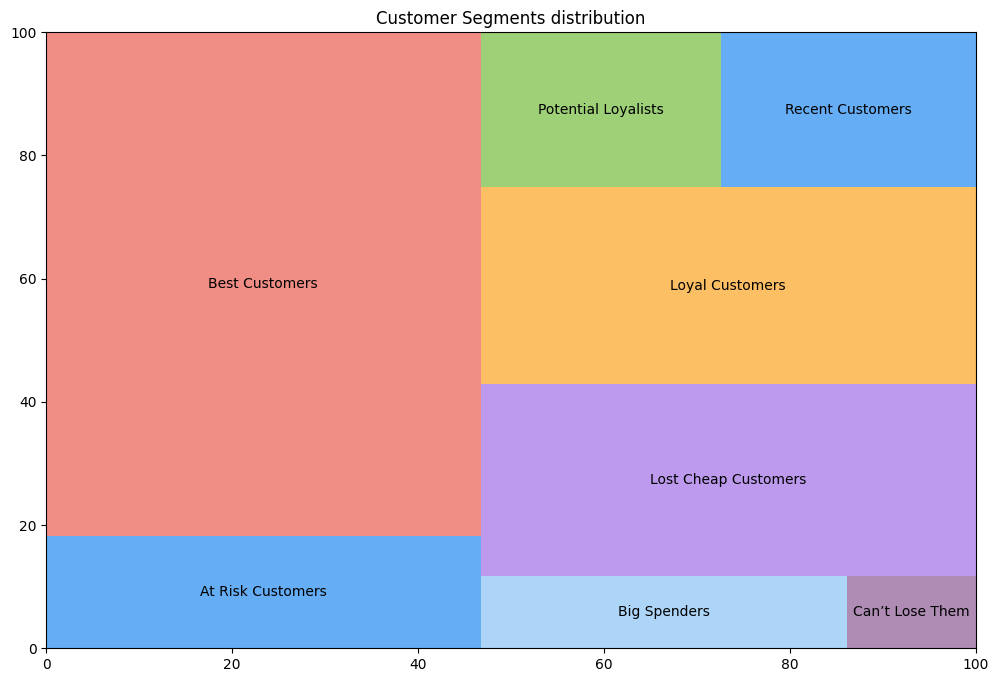

In [49]:
color_list = ["#248af1", "#eb5d50", "#8bc4f6", "#8c5c94", "#a170e8", "#fba521", "#75bc3f"]
plt.figure(figsize=(12,8))
plt.title('Customer Segments distribution')
squarify.plot(sizes=score, label=segment,color=color_list, alpha=0.7)
plt.show()

**Customer Category Explanations**
•	**Best Customers**:Highest frequency as well as monetary value with
least recency.

•	**Loyal Customers:**High frequency as well as monetary value with good recency.

•	**Potential Loyalists:** High recency and monetary value, average frequency

•	**Big Spenders:** High monetary value but good recency and frequency values.

•	**At Risk Customers**:Customers shopping less often now who used to shop a lot.

•	**Can’t Lose Them**:Customers shopped long ago who used to shop a lot

•	**Recent Customers:**Customers who recently started shopping a lot but with less monetary value.

•	**Lost Cheap Customers**:Customers shopped long ago but with less frequency and monetary value.



In [50]:
#extracting best, loyal and potential customers from the customers dataset created
customers=ret_rfm[ret_rfm['RFM_Segment']=='444'].sort_values('MonetaryValue', ascending=False)

In [54]:
customers_segments = pd.concat([customers, ret_rfm[ret_rfm['RFM_Segment']=='344'].sort_values('MonetaryValue', ascending=False)])
customers_segments = pd.concat([customers, ret_rfm[ret_rfm['RFM_Segment']=='434'].sort_values('MonetaryValue', ascending=False)])

In [55]:
customers_segments.to_excel(r"C:\Users\bhavy\OneDrive\Desktop\Spring2024\ITM 617\Final Project\Customer_Excel.xlsx", index=False)

In [58]:
# Assuming df is your DataFrame
customers_segments.to_excel('customers_segmentsRFM.xlsx', index=False)

# Download the file
from google.colab import files
files.download('customers_segmentsRFM.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
customers =customers_segments

In [60]:
customers.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segment
4372,,0,135037,1447487.53,4,4,4,444,12,Best Customers
1703,14646,1,2085,279489.02,4,4,4,444,12,Best Customers
4233,18102,0,433,256438.49,4,4,4,444,12,Best Customers
3758,17450,7,350,187322.17,4,4,4,444,12,Best Customers
1895,14911,0,5898,132458.73,4,4,4,444,12,Best Customers
1345,14156,9,1415,113214.59,4,4,4,444,12,Best Customers
3801,17511,2,1076,88125.38,4,4,4,444,12,Best Customers
3202,16684,3,281,65892.08,4,4,4,444,12,Best Customers
1005,13694,3,584,62690.54,4,4,4,444,12,Best Customers
2192,15311,0,2478,59284.19,4,4,4,444,12,Best Customers


***STEP 2*** Creating a word cloud by employing clustering technique to product descriptions

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import itertools
import nltk
nltk.download('punkt')
import wordcloud


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [62]:
data = pd.read_excel('/content/final (2).xlsx')
print(data.head(5))
print(data.shape)

   Unnamed: 0.1  Unnamed: 0 InvoiceNo StockCode  \
0             9           9    536367     84879   
1            10          10    536367     22745   
2            11          11    536367     22748   
3            12          12    536367     22749   
4            13          13    536367     22310   

                         Description  Quantity         InvoiceDate  UnitPrice  \
0      ASSORTED COLOUR BIRD ORNAMENT        32 2010-12-01 08:34:00       1.69   
1         POPPY'S PLAYHOUSE BEDROOM          6 2010-12-01 08:34:00       2.10   
2          POPPY'S PLAYHOUSE KITCHEN         6 2010-12-01 08:34:00       2.10   
3  FELTCRAFT PRINCESS CHARLOTTE DOLL         8 2010-12-01 08:34:00       3.75   
4            IVORY KNITTED MUG COSY          6 2010-12-01 08:34:00       1.65   

   CustomerID         Country  Segment  Score      SegmentType  
0       13047  United Kingdom      344     11  Loyal Customers  
1       13047  United Kingdom      344     11  Loyal Customers  
2       130

In [63]:
# Convert the 'Stockcode' to string type
data['StockCode'].astype(str)

0         84879
1         22745
2         22748
3         22749
4         22310
          ...  
230827    22466
230828    22061
230829    23275
230830    21217
230831    20685
Name: StockCode, Length: 230832, dtype: object

In [64]:
data.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID               int64
Country                 object
Segment                  int64
Score                    int64
SegmentType             object
dtype: object

**Data Preprocessing and Cleaning**

In [65]:
# Checking and Removing null values.
info = pd.DataFrame(data=data.isnull().sum()).T.rename(index={0:'Null values'})
info = pd.concat([info, pd.DataFrame(data=data.isnull().sum()/data.shape[0] * 100).T.rename(index={0:'% Null values'})])
info

,Unnamed: 0.1,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Segment,Score,SegmentType
Null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% Null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
data.dropna(axis=0, subset = ['CustomerID'], inplace=True)
info = pd.concat([info, pd.DataFrame(data=data.isnull().sum()/data.shape[0] * 100).T.rename(index={0:'% Null values'})], axis=0)
info

,Unnamed: 0.1,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Segment,Score,SegmentType
Null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% Null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% Null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
#checking and removing duplicate data
data.duplicated().sum()
data.drop_duplicates(inplace=True)

Exploratory Data Analysis

In [68]:
pd.DataFrame({'products':len(data['StockCode'].value_counts()),
              'transanctions':len(data['InvoiceNo'].value_counts()),
              'Customers':len(data['CustomerID'].value_counts())},
             index = ['Quantity'])

,products,transanctions,Customers
Quantity,3520,11749,759


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['products']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'products'}, axis=1)
              .sort_values('products', ascending=True))
  xs = counted['products']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('products', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('products')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['transanctions']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'transanctions'}, axis=1)
              .sort_values('transanctions', ascending=True))
  xs = counted['transanctions']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('transanctions', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transanctions')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Customers']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Customers'}, axis=1)
              .sort_values('Customers', ascending=True))
  xs = counted['Customers']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Customers', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customers')
_ = plt.ylabel('count()')

In [69]:
#no of items bought in single transaction
df = data.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
df = df.rename(columns = {'InvoiceDate':'Number of products'})
#df[:10].sort_values('CustomerID')
df['orders cancelled'] = df['InvoiceNo'].apply(lambda x: int('C' in str(x)))

Identifying cancelled transactions from the original data and eliminating them to make the model more reliable.

In [70]:
for index, col in df.iterrows():
    if data[(data['CustomerID'] == col[0]) & (data['Quantity'] == -col[1]) & (data['Description'] == col[2])].shape[0] == 0:
        #print(index, df.loc[index])
        #print("There are some transanctions for which counterpart does not exist")
        break
df_cleaned = data.copy(deep=True)
df_cleaned['QuatityCancelled'] = 0
entry_to_remove = []; doubtful_entry = []

The code is filtering the DataFrame data to create a new DataFrame df_test containing rows that meet specific criteria related to Quantity, Description, CustomerID, StockCode, and InvoiceDate.


In [71]:
for index, col in data.iterrows():
    if(col['Quantity'] > 0)or(col['Description']=='Discount'):continue
    df_test = data[(data['CustomerID']==col['CustomerID'])&(data['StockCode']==col['StockCode'])&
                   (data['InvoiceDate']<col['InvoiceDate'])&(data['Quantity']>0)].copy()


In [72]:
# Order cancelled without counterpart, these are doubtful as they maybe errors or maybe orders were placed before data given
if(df_test.shape[0] == 0):
        doubtful_entry.append(index)
 # Cancellation with single counterpart
elif(df_test.shape[0] == 1):
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCancelled'] = -col['Quantity']
        entry_to_remove.append(index)
  # Various counterpart exists for orders
elif(df_test.shape[0] > 1):
        df_test.sort_index(axis = 0, ascending=False, inplace=True)
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']:continue
            df_cleaned.loc[ind, 'QuantityCancelled'] = -col['Quantity']
            entry_to_remove.append(index)
            break

In [73]:
# Deleting these entries :
df_cleaned.drop(entry_to_remove, axis=0, inplace=True)
df_cleaned.drop(doubtful_entry, axis=0, inplace=True)

In [74]:
df_cleaned['StockCode'].head()

0    84879
1    22745
2    22748
3    22749
4    22310
Name: StockCode, dtype: object

In [75]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex = True, na = False)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'DOT', 'CRUK', 'PADS'],
      dtype=object)

In [76]:
for code in list_special_codes:
    print("{:<17} -> {:<35}".format(code, df_cleaned[df_cleaned['StockCode'] == code]['Description'].values[0]))

POST              -> POSTAGE                            
D                 -> Discount                           
C2                -> CARRIAGE                           
M                 -> Manual                             
BANK CHARGES      -> Bank Charges                       
DOT               -> DOTCOM POSTAGE                     
CRUK              -> CRUK Commission                    
PADS              -> PADS TO MATCH ALL CUSHIONS         


In [77]:
df_cleaned['QuantityCancelled'] = np.nan_to_num(df_cleaned['QuantityCancelled'])
df_cleaned.head()

,Unnamed: 0.1,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Segment,Score,SegmentType,QuatityCancelled,QuantityCancelled
0,9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,344,11,Loyal Customers,0,0.0
1,10,10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047,United Kingdom,344,11,Loyal Customers,0,0.0
2,11,11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047,United Kingdom,344,11,Loyal Customers,0,0.0
3,12,12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2010-12-01 08:34:00,3.75,13047,United Kingdom,344,11,Loyal Customers,0,0.0
4,13,13,536367,22310,IVORY KNITTED MUG COSY,6,2010-12-01 08:34:00,1.65,13047,United Kingdom,344,11,Loyal Customers,0,0.0


In [78]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCancelled'])
df_cleaned.sort_values('CustomerID')[:5]

,Unnamed: 0.1,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Segment,Score,SegmentType,QuatityCancelled,QuantityCancelled,TotalPrice
181598,428989,428989,573511,22699,ROSES REGENCY TEACUP AND SAUCER,18,2011-10-31 12:25:00,2.95,12347,Iceland,444,12,Best Customers,0,0.0,53.1
117048,286621,286621,562032,23308,SET OF 60 VINTAGE LEAF CAKE CASES,24,2011-08-02 08:48:00,0.55,12347,Iceland,444,12,Best Customers,0,0.0,13.2
117049,286622,286622,562032,23297,SET 40 HEART SHAPE PETIT FOUR CASES,16,2011-08-02 08:48:00,1.65,12347,Iceland,444,12,Best Customers,0,0.0,26.4
117050,286623,286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347,Iceland,444,12,Best Customers,0,0.0,17.0
117051,286624,286624,562032,22374,AIRLINE BAG VINTAGE JET SET RED,4,2011-08-02 08:48:00,4.25,12347,Iceland,444,12,Best Customers,0,0.0,17.0


Defining Total Purchase made by each customer (based on CustomerID and Invoice No information) as **Basket Price**

In [79]:
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice': 'Basket Price'})

In [80]:
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()

In [81]:
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace=True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

In [82]:
df_cleaned.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description',
       'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country',
       'Segment', 'Score', 'SegmentType', 'QuatityCancelled',
       'QuantityCancelled', 'TotalPrice'],
      dtype='object')

In [83]:
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
0,12347,537626,711.79,2010-12-07 14:57:00.000000000
1,12347,542237,475.39,2011-01-26 14:29:59.999999744
2,12347,549222,636.25,2011-04-07 10:43:00.000000000
3,12347,556201,382.52,2011-06-09 13:01:00.000000000
4,12347,562032,584.91,2011-08-02 08:48:00.000000000
5,12347,573511,1294.32,2011-10-31 12:25:00.000000000


In [84]:
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i,price in enumerate(price_range):
    if i==0:continue
    val = basket_price[(basket_price['Basket Price'] < price)&
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)

In [85]:
is_noun = lambda pos:pos[:2] == 'NN'
def keywords_inventory(dataframe, colonne = 'Description'):
    import nltk
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots = dict()
    keywords_select = dict()
    category_keys = []
    count_keywords = dict()
    icount = 0

In [86]:
!python3 -m nltk.downloader averaged_perceptron_tagger

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [87]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def is_noun(pos):
    return pos[0] == 'N'

dataframe = data
colonne = 'Description'

keywords_roots = {}
count_keywords = {}

for s in dataframe[colonne]:
    if pd.isnull(s): continue
    lines = s.lower()
    tokenized = nltk.word_tokenize(lines)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]

    for t in nouns:
        t = t.lower() ; racine = stemmer.stem(t)
        if racine in keywords_roots:
            keywords_roots[racine].add(t)
            count_keywords[racine] += 1
        else:
            keywords_roots[racine] = {t}
            count_keywords[racine] = 1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [88]:
df_produits = pd.DataFrame(data['Description'].unique()).rename(columns = {0:"Description"})

In [89]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def is_noun(pos):
    return pos[0] == 'N'

def keywords_inventory(df):

    #Extracts keywords from a product description DataFrame and returns a tuple of
    #(keywords, keywords_roots, keywords_select, count_keywords)

    keywords_roots = {}
    count_keywords = {}
    keywords_select = set()

    for index, row in df.iterrows():
        if pd.isnull(row['Description']): continue
        lines = row['Description'].lower()
        tokenized = word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]

        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1

    # select keywords based on frequency and relevance
    for root, keywords in keywords_roots.items():
        if len(keywords) > 1 and count_keywords[root] > 10:
            keywords_select.update(keywords)

    keywords = sorted(list(keywords_select))

    return keywords, keywords_roots, keywords_select, count_keywords

keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Creating a **word cloud** using data from product descriptions.

In [90]:
keywords_select = list(keywords_select)

In [91]:
keywords_select = list(keywords_select)
list_products = []
for root, count in count_keywords.items():
    for word in keywords_select:
        if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
        if len(word) < 3 or count < 13: continue
        list_products.append([word, count])

list_products.sort(key=lambda x: x[1], reverse=True)
# print("Number of preserved words : ", len(list_products))

threshold = [0, 1, 2, 3, 5, 10]

In [92]:
list_products.sort(key = lambda x:x[1], reverse=True)
#print("Number of preserved words : ", len(list_products))

threshold = [0, 1, 2, 3, 5, 10]

In [93]:
# Getting the description.
list_produits = df_cleaned['Description'].unique()

In [94]:
# Creating the product and word matrix.
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), list_produits))

<ipython-input-94-acc223247c7c>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.loc[:, key] = list(map(lambda x:int(key.upper() in x), list_produits))
<ipython-input-94-acc223247c7c>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.loc[:, key] = list(map(lambda x:int(key.upper() in x), list_produits))
<ipython-input-94-acc223247c7c>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

In [95]:
label_col = []
for i in range(len(threshold)):
    if i == len(threshold) - 1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i], threshold[i+1])

    label_col.append(col)
    X.loc[:, col] = 0

<ipython-input-95-994a1cfa9b77>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.loc[:, col] = 0
<ipython-input-95-994a1cfa9b77>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.loc[:, col] = 0
<ipython-input-95-994a1cfa9b77>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.loc[:, col] = 0
<ipy

In [96]:
for i, prod in enumerate(list_produits):
    prix = df_cleaned[df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0

    while prix > threshold[j]:
        j += 1
        if j == len(threshold):
            break
    X.loc[i, label_col[j-1]] = 1

In [97]:
#print("{:<8} {:<20} \n".format('range', 'number of products') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
   # print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

**CLUSTERING TO BUILD A WORD CLOUD BASED ON PRODUCT DESCRIPTIONS**

The **silhouette score** is a metric that measures how well-separated the clusters are. It ranges from -1 to 1, where a higher score indicates better separation

In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [99]:
#Defining number of clustering based on Silhouette scores for the list of products
matrix = X.values

for n_clusters in range(3, 10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    sil_avg = silhouette_score(matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  3 The average silhouette_score is :  0.16217315716606126
For n_clusters :  4 The average silhouette_score is :  0.189213119616254
For n_clusters :  5 The average silhouette_score is :  0.2152804115988819
For n_clusters :  6 The average silhouette_score is :  0.21909454559514485
For n_clusters :  7 The average silhouette_score is :  0.22215182141504988
For n_clusters :  8 The average silhouette_score is :  0.2220409520499316
For n_clusters :  9 The average silhouette_score is :  0.22539823502926415


In [100]:
n_clusters = 5
sil_avg = -1
while sil_avg < 0.145:
    kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    sil_avg = silhouette_score(matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

pd.Series(clusters).value_counts()


For n_clusters :  5 The average silhouette_score is :  0.2147908186723859


2    1002
4     923
0     731
3     627
1     426
Name: count, dtype: int64

In [101]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    import matplotlib as mpl

In [102]:
lst = pd.DataFrame(list_produits)
lst_words = [word for (word, occurance) in list_products]

occurance = [dict() for _ in range(n_clusters)]

In [103]:
# Creating data for printing word cloud.
for i in range(n_clusters):
    liste_cluster = lst.loc[clusters == i]
    for word in lst_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurance[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))

In [104]:
from random import randint
import random

In [105]:
def random_color_func(word=None, font_size=None, position=None,orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [106]:
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4, 2, increment)
    words = dict()
    trunc_occurances = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]

In [107]:
wc = wordcloud.WordCloud(width=1000,height=400, background_color='lightgrey', max_words=1628,relative_scaling=1,
                             color_func = random_color_func, normalize_plurals=False)

In [108]:
import matplotlib.pyplot as plt

In [109]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a frequency distribution of words
wc_freq = WordCloud(background_color="white", max_words=1000).generate_from_frequencies(wc)

# Create a WordCloud object with the desired parameters
wc = WordCloud(width=1000, height=400, background_color='lightgrey', max_words=1628, relative_scaling=1,
               color_func=random_color_func, normalize_plurals=False)

# Generate the word cloud from the frequency distribution
wc.generate_from_frequencies(wc_freq)

# Display the word cloud
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title('cluster n{}'.format(increment-1))
plt.show()

AttributeError: 'WordCloud' object has no attribute 'items'

In [110]:
increment = 1

In [111]:
!pip install wordcloud

In [112]:
from wordcloud import WordCloud

In [113]:
def make_wordcloud(liste, increment):
    words = dict()
    trunc_occurances = liste[0:150]
    for s in trunc_occurances:
        words[s[0]] = s[1]
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(words)
    plt.figure(increment)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

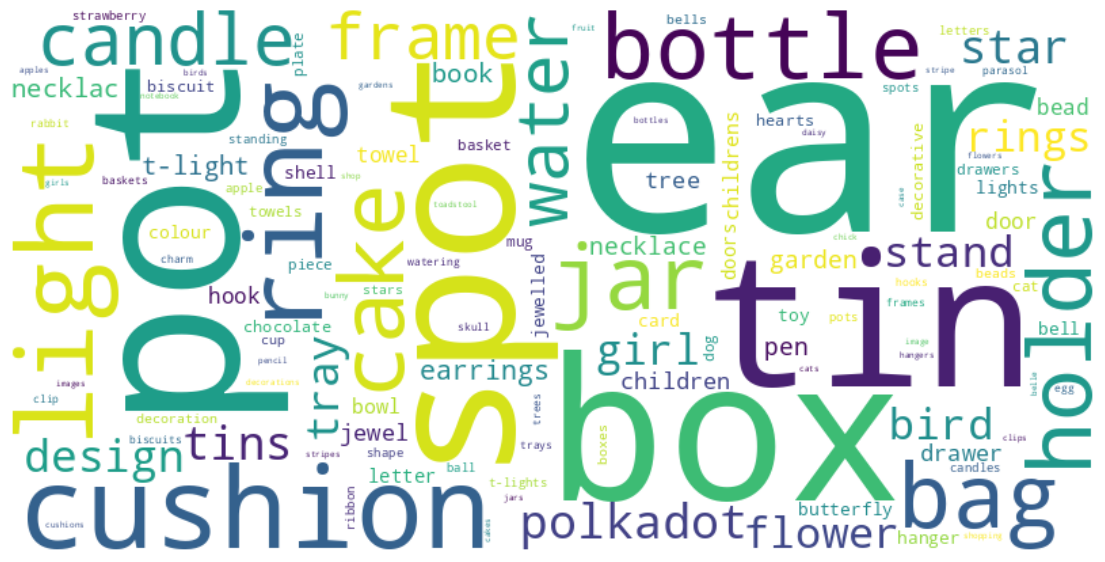

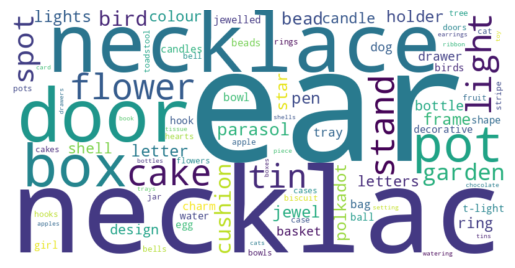

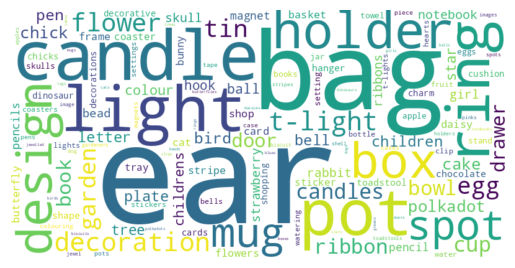

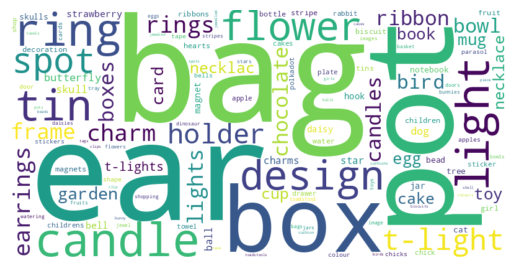

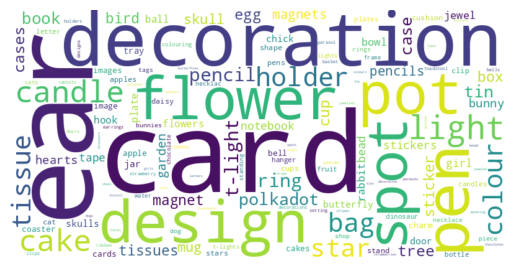

In [114]:
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurance[i]
    tone = color[i]
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
        liste.sort(key = lambda x:x[1], reverse = True)

    make_wordcloud(liste, i+1)

**STEP 3** Defining features like Basket Price, days from last purchase and days from first purchase for each customer Id
Employed Clustering to categorize customers into different clusters based on above variables.


**PRINCIPAL COMPONENT ANALYSIS**

PCA is a dimensionality reduction technique that aims to transform a high-dimensional dataset into a lower-dimensional space while preserving most of the information. It does this by finding a new set of variables, called principal components, which are linear combinations of the original variables that explain the most variance in the data.

In [115]:
from sklearn.decomposition import PCA

In [116]:
#Applying PCA to transform matrix which
#contains the information of product categories defined using clustering
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

In [117]:
corresp = dict()
for key, val in zip(list_produits, clusters):
    corresp[key] = val

df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)
df_cleaned[['InvoiceNo', 'Description', 'categ_product']][:10]

,InvoiceNo,Description,categ_product
0,536367,ASSORTED COLOUR BIRD ORNAMENT,2
1,536367,POPPY'S PLAYHOUSE BEDROOM,3
2,536367,POPPY'S PLAYHOUSE KITCHEN,3
3,536367,FELTCRAFT PRINCESS CHARLOTTE DOLL,0
4,536367,IVORY KNITTED MUG COSY,2
5,536367,BOX OF 6 ASSORTED COLOUR TEASPOONS,0
6,536367,BOX OF VINTAGE JIGSAW BLOCKS,1
7,536367,BOX OF VINTAGE ALPHABET BLOCKS,0
8,536367,HOME BUILDING BLOCK WORD,1
9,536367,LOVE BUILDING BLOCK WORD,1


**Feature Engineering**-Feature engineering is the process of transforming raw data into meaningful features that enhance the performance of machine learning models. It involves selecting, creating, and transforming features to improve model accuracy, interpretability, and robustness.

Creating 5 new features that will contain the amount in a single transanction on different categories of product.

In [118]:
for i in range(5):
    col = 'categ_{}'.format(i)
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCancelled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)

In [119]:
df_cleaned[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']][:10]
# sum of purchases by user and order.
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index = False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice': 'Basket Price'})

In [120]:
for i in range(5):
    col = "categ_{}".format(i)
    temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price = basket_price.merge(temp, on=['CustomerID', 'InvoiceNo'], how='left')
    basket_price.loc[:, col] = basket_price[col].fillna(0)
    basket_price[col] = basket_price[col] / basket_price.groupby('CustomerID')[col].transform('sum')

In [121]:
# Dates of the order.
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index = False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace=True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

In [122]:
# Selecting entries with basket price > 0.
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending=True)[:5]

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
0,12347,537626,711.79,0.200315,0.379691,0.167682,0.093008,0.046362,2010-12-07 14:57:00.000000000
1,12347,542237,475.39,0.141658,0.000000,0.098621,0.059217,0.207521,2011-01-26 14:29:59.999999744
2,12347,549222,636.25,0.104648,0.000000,0.296399,0.079291,0.160485,2011-04-07 10:43:00.000000000
3,12347,556201,382.52,0.115239,0.060719,0.066643,0.087053,0.082026,2011-06-09 13:01:00.000000000
4,12347,562032,584.91,0.134120,0.298407,0.098262,0.133489,0.121453,2011-08-02 08:48:00.000000000


In [123]:
import datetime
set_entrainment = basket_price[basket_price['InvoiceDate'] < pd.Timestamp(2011, 10, 1)]
set_test = basket_price[basket_price['InvoiceDate'] >= pd.Timestamp(2011, 10, 1)]
basket_price = set_entrainment.copy(deep = True)

In [124]:
transanctions_per_user = basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count', 'min', 'max', 'mean', 'sum'])

In [125]:
for i in range(5):
    col = 'categ_{}'.format(i)
    transanctions_per_user.loc[:, col] = basket_price.groupby(by=['CustomerID'])[col].sum() / transanctions_per_user['sum'] * 100

In [126]:
transanctions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transanctions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347,5,382.52,711.79,558.172000,2790.86,0.024938,0.026473,0.026071,0.016198,0.022138
1,12359,3,547.50,1838.91,1165.243333,3495.73,0.014485,0.017758,0.014418,0.016129,0.026657
2,12362,5,303.76,829.99,515.468000,2577.34,0.015736,0.015081,0.024959,0.019294,0.020508
3,12380,2,607.55,626.01,616.780000,1233.56,0.020633,0.033359,0.045459,0.047967,0.054962
4,12381,1,1268.74,1268.74,1268.740000,1268.74,0.047050,0.056055,0.066242,0.056941,0.047167


In [127]:
# Generating two new variables - days since first puchase and days since last purchase.
last_date = basket_price['InvoiceDate'].max().date()

In [128]:
first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())

In [129]:
last_purchase = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

In [130]:
test = first_registration.applymap(lambda x:(last_date - x.date()).days)

In [131]:
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

Creating a new dataset **transactions_per_user**, defining variables Days since **first purchase** and days since **last purchase**.

In [132]:
transanctions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']

In [133]:
transanctions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

In [134]:
transanctions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12347,5,382.52,711.79,558.172000,2790.86,0.024938,0.026473,0.026071,0.016198,0.022138,59,297
1,12359,3,547.50,1838.91,1165.243333,3495.73,0.014485,0.017758,0.014418,0.016129,0.026657,119,261
2,12362,5,303.76,829.99,515.468000,2577.34,0.015736,0.015081,0.024959,0.019294,0.020508,2,225
3,12380,2,607.55,626.01,616.780000,1233.56,0.020633,0.033359,0.045459,0.047967,0.054962,8,115
4,12381,1,1268.74,1268.74,1268.740000,1268.74,0.047050,0.056055,0.066242,0.056941,0.047167,49,49


In [135]:
n1 = transanctions_per_user[transanctions_per_user['count'] == 1].shape[0]

In [136]:
n2 = transanctions_per_user.shape[0]

In [137]:
print("No. of Customers with single purchase : {:<2}/{:<5} ({:<2.2f}%)".format(n1, n2, n1/n2*100))

No. of Customers with single purchase : 42/739   (5.68%)


In [138]:
list_cols = ['count', 'min', 'max', 'mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']

In [139]:
# Naming the dataset as selected_customers
selected_customers = transanctions_per_user.copy(deep=True)

In [140]:
selected_customers.columns

Index(['CustomerID', 'count', 'min', 'max', 'mean', 'sum', 'categ_0',
       'categ_1', 'categ_2', 'categ_3', 'categ_4', 'LastPurchase',
       'FirstPurchase'],
      dtype='object')

In [141]:
matrix = selected_customers[list_cols].values

In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
scaler = StandardScaler()
scaler.fit(matrix)

StandardScaler()

In [144]:
print("Variable Mean Values: \n" + 90*'-' + '\n', scaler.mean_)

Variable Mean Values: 
------------------------------------------------------------------------------------------
 [9.26792963e+00 2.37315832e+02 1.14176087e+03 5.50518245e+02
 2.84918130e-02 3.01536641e-02 2.97362190e-02 2.78676741e-02
 3.01537174e-02]


In [145]:
scaled_matrix = scaler.transform(matrix)

In [146]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)
pca

PCA()

In [147]:
# Checking the amount of variance explained
# Using optimal number of clusters using hyperparameter tuning:
for n_clusters in range(3, 21):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(scaled_matrix)
    clusters = kmeans.predict(scaled_matrix)
    sil_avg = silhouette_score(scaled_matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)

For n_clusters :  3 The average silhouette_score is :  0.35296389407117706
For n_clusters :  4 The average silhouette_score is :  0.37400124665303647
For n_clusters :  5 The average silhouette_score is :  0.27280996350627107
For n_clusters :  6 The average silhouette_score is :  0.2673301719437029
For n_clusters :  7 The average silhouette_score is :  0.22698884229102
For n_clusters :  8 The average silhouette_score is :  0.2197105611640741
For n_clusters :  9 The average silhouette_score is :  0.22794826719493033
For n_clusters :  10 The average silhouette_score is :  0.23168767208194466
For n_clusters :  11 The average silhouette_score is :  0.235698331256313
For n_clusters :  12 The average silhouette_score is :  0.23740855729812657
For n_clusters :  13 The average silhouette_score is :  0.21047409641093198
For n_clusters :  14 The average silhouette_score is :  0.2325013288819569
For n_clusters :  15 The average silhouette_score is :  0.24463576623190467
For n_clusters :  16 The av

In [151]:
# Choosing number of clusters as 10:
# Trying Improving the silhouette_score :
n_clusters = 10
sil_avg = -1
while sil_avg < 0.16:
    kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 30)
    kmeans.fit(scaled_matrix)
    clusters = kmeans.predict(scaled_matrix)
    sil_avg = silhouette_score(scaled_matrix, clusters)
    print("For n_clusters : ", n_clusters, "The average silhouette_score is : ", sil_avg)
    n_clusters = 10

For n_clusters :  10 The average silhouette_score is :  0.23346467203880186


In [152]:
kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print("Silhouette Score : {:<.3f}".format(silhouette_avg))

Silhouette Score : 0.233


In [153]:
sample_silhouette_values = silhouette_score(scaled_matrix, clusters_clients)

In [154]:
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)
selected_customers.loc[:, 'cluster'] = clusters_clients

In [155]:
merged_df = pd.DataFrame()

In [156]:
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])

In [157]:
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('Number of customers : ', merged_df['size'].sum())

Number of customers :  739


In [158]:
merged_df = merged_df.sort_values('sum')

In [159]:
selected_customers.to_csv("Downloads")

In [160]:
merged_df.to_csv("/content/merged_df.csv")

In [162]:
selected_customers = pd.read_csv('/content/selected_customers.csv')

In [163]:
merged_df = pd.read_csv('merged_df.csv')

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [165]:
class Class_Fit(object):
    def __init__(self, clf, params = None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()

In [166]:
def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

In [167]:
def predict(self, x):
        return self.clf.predict(x)

In [168]:
def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)

In [169]:
def grid_fit(self, X, Y):
        self.grid.fit(X, Y)

In [170]:
def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} %".format(100 * accuracy_score(Y, self.predictions)))

Selected_Customers that has the details of the customer ID, different categories, first purchase, last purchase days and the cluster information of each customer. We will be using this dataset to train our models in the next steps.

In [171]:
selected_customers.columns

Index(['Unnamed: 0', 'CustomerID', 'count', 'min', 'max', 'mean', 'sum',
       'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4', 'LastPurchase',
       'FirstPurchase', 'cluster'],
      dtype='object')

In [172]:
selected_customers.head()

,Unnamed: 0,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,cluster
0,0,12347.0,5,382.52,711.79,558.172000,2790.86,10.442659,36.519926,29.836681,14.524555,8.676179,59,297,1
1,1,12348.0,4,227.44,892.80,449.310000,1797.24,38.016069,20.030714,41.953217,0.000000,0.000000,5,288,0
2,2,12350.0,1,334.40,334.40,334.400000,334.40,11.692584,11.961722,48.444976,27.900718,0.000000,240,240,0
3,3,12352.0,6,144.35,840.30,345.663333,2073.98,0.491808,68.944734,12.892120,3.370331,14.301006,2,226,4
4,4,12353.0,1,89.00,89.00,89.000000,89.00,0.000000,44.719101,13.033708,19.887640,22.359551,134,134,4


In [173]:
#Defining X and Y variables
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
X = selected_customers[columns]
Y = selected_customers['cluster']

In [174]:
#Partitioning the Dataset into training and testing datasets
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

In [176]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

**STEP 4**-Training of a supervised machine learning model to predict customer
clusters based on selected features. Common algorithms for this task include logistic regression, decision trees, random forests, support vector machines, and k-nearest neighbors, facilitating customer segmentation, targeted marketing campaigns, and various business applications.

By preparing the data in this way, we can train a supervised machine learning model that can predict the cluster of a customer based on their values for the selected features.

Machine learning algorithms that are being employed for this task include:

•	Decision trees

•	Random forests

•	Support vector machines

•	K-nearest neighbors

•	Gradient Boosting


Once the model is trained, it can be used to predict the cluster of new customers, which can be useful for customer segmentation, marketing campaigns, and other business applications.


**SUPPORT VECTOR MACHINE**-The objective of this classifier is to fit to the
provided data and returning a hyperplane that divides, or categorizes our data, and
when provided with some features returns the predicted class.

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

class Class_Fit:
    def __init__(self, clf=LinearSVC()):
        self.clf = clf

    def grid_search(self, parameters, Kfold):
        self.grid_search = GridSearchCV(estimator=self.clf, param_grid=parameters, cv=Kfold)

    def grid_fit(self, X, Y):
        self.grid_search.fit(X, Y)

    def grid_predict(self, X, Y):
        return self.grid_search.predict(X), self.grid_search.score(X, Y)

In [179]:
svc = Class_Fit()
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)
svc.grid_fit(X=X_train, Y=Y_train)
print("Support Vector Machine:")
Y_pred, score = svc.grid_predict(X_test, Y_test)
print("Predictions:", Y_pred)
print("Score:", score)

Support Vector Machine:
Predictions: [4 0 1 1 1 7 1 0 1 1 1 1 4 1 7 1 1 7 1 1 1 1 1 2 1 8 8 1 1 4 4 1 1 1 8 0 1
 1 1 7 0 0 4 1 1 2 1 1 2 2 8 2 1 1 1 8 8 1 0 1 1 7 8 1 1 0 1 2 1 1 7 1 1 1
 1 1 4 0 1 0 8 2 8 1 1 1 1 0 1 1 2 1 1 1 1 8 7 0 1 0 1 4 1 4 8 0 1 8 1 1 1
 7 1 2 1 1 1 1 2 0 1 1 4 1 1 1 7 1 4 1 8 2 4 1 4 1 1 7 0 1 0 1 1 1 4 1 4 2
 1 1 1 1 8 1 2 8 1 1 1 1 2 1 1 1 2 1 2 1 4 0 7 1 1 1 7 1 1 1 1 1 2 1 1 1 1
 2 4 4 2 1 1 7 4 4 1 1 1 1 1 1 1 8 1 1 1 1 4 1 1 1 0 1 4 2 1 1 0 7 4 1 7 2
 4 4 2 1 1 1 0 8 1 2 0 1 1 1 1 4 8 0 4 8 1 1 7 2 1 1 1 2 2 2 1 4 2 7 1 0 1
 4 1 1 0 1 2 0 4 0 1 1 1 4 1 1 1 2 1 1 1 4 7 0 1 1 1 8 4 7 1 4 4 1 1 4 1 1
 1 1 1 1 1 2 7 1 1 1 1 2 1 1 1 0 4 0 0 1 0 1 8 4 0 1 0 4 1 4 8 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 4 1 1 7 1 1 4 1 2 1 1 1 7 4 4 2 0 0 7 8 1 1 1 7 4 1 4 1 1
 1 1 1 4 2 1 1 4 8 4 4 1 1 1 1 1 0 8 1 8 7 8 2 7 2 1 1 0 1 8 1 8 1 1 2 1 8
 1 1 1 7 2 8 7 1 1 2 1 1 1 2 1 8 0 1 1 1 1 2 1 1 1 0 4 1 2 0 2 1 0 1 8 1 1
 4 4 8 1 7 1 1 1 1 4 1 0 1 1 1 1 4 4 1 1 1 1 4 8 1 4 2 4 8 1 1 

In [180]:
# Calculate accuracy measures
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred, average='weighted')
recall = metrics.recall_score(Y_test, Y_pred, average='weighted')
f1 = metrics.f1_score(Y_test, Y_pred, average='weighted')

print("SVM_Model_Accuracy:", accuracy)
print("SVM_Model_Precision:", precision)
print("SVM_Model_Recall:", recall)
print("SVM_Model_F1 Score:", f1)

SVM_Model_Accuracy: 0.8296398891966759
SVM_Model_Precision: 0.8074673536057448
SVM_Model_Recall: 0.8296398891966759
SVM_Model_F1 Score: 0.8035830699211243


**KNN CLASSIFICATION**-It is a simple algorithm that stores all available cases and
classifies new cases based on a similarity measure.


In [183]:
from sklearn.neighbors import KNeighborsClassifier

In [184]:
knn = Class_Fit(clf=KNeighborsClassifier())
knn.grid_search(parameters=[{'n_neighbors': np.arange(1, 50, 1)}], Kfold=5)
knn.grid_fit(X_train, Y_train)
print("k-Nearest Neighbors:")
knn.grid_predict(X_test, Y_test)

k-Nearest Neighbors:


(array([4, 0, 1, 1, 1, 7, 1, 0, 0, 1, 4, 1, 4, 3, 7, 1, 1, 7, 1, 3, 1, 7,
        1, 1, 3, 0, 8, 3, 1, 4, 4, 1, 1, 1, 8, 0, 4, 1, 1, 1, 0, 0, 4, 1,
        7, 2, 1, 1, 2, 2, 8, 1, 1, 1, 1, 8, 8, 1, 0, 1, 4, 7, 8, 1, 1, 0,
        1, 2, 3, 1, 7, 3, 1, 1, 1, 1, 1, 0, 1, 0, 8, 2, 8, 1, 7, 1, 3, 0,
        3, 1, 2, 1, 3, 3, 1, 8, 7, 0, 1, 0, 1, 4, 1, 4, 8, 0, 1, 8, 0, 1,
        1, 7, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 4, 3, 1, 0, 7, 1, 4, 1, 8, 2,
        4, 1, 4, 1, 1, 7, 4, 1, 0, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 8, 1,
        2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 4, 0, 7, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 4, 4, 2, 1, 1, 7, 4, 4, 1, 1, 1, 1,
        1, 3, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 0, 8, 4, 1, 1, 7, 0, 7, 4, 1,
        3, 2, 4, 4, 2, 8, 1, 1, 0, 8, 1, 1, 0, 1, 1, 5, 1, 1, 1, 0, 4, 8,
        1, 3, 7, 2, 1, 1, 1, 1, 2, 2, 4, 4, 2, 7, 3, 1, 1, 1, 1, 1, 0, 0,
        2, 0, 4, 0, 1, 1, 1, 4, 4, 1, 1, 2, 1, 3, 1, 1, 0, 0, 1, 1, 7, 8,
        4, 3, 1, 4, 4, 1, 1, 4, 2, 1, 

In [185]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy measures
accuracy = accuracy_score(Y_test, Y_pred)
print("KNN_Model_Accuracy:", accuracy)

precision = precision_score(Y_test, Y_pred, average='weighted')
print("KNN_Model_Precision:", precision)

recall = recall_score(Y_test, Y_pred, average='weighted')
print("KNN_Model_Recall:", recall)

f1 = f1_score(Y_test, Y_pred, average='weighted')
print("KNN_Model_F1 Score:", f1)

KNN_Model_Accuracy: 0.8296398891966759
KNN_Model_Precision: 0.8074673536057448
KNN_Model_Recall: 0.8296398891966759
KNN_Model_F1 Score: 0.8035830699211243


**DECISION TREES**-A decision tree classifier is a tree in which internal nodes are labeled
by features. It categorizes an object xi by recursively testing for the weights that the
features labeling the internal nodes have in vector xi, until a leaf node is reached.

In [186]:
from sklearn.tree import DecisionTreeClassifier

tr = Class_Fit(clf=DecisionTreeClassifier())
tr.grid_search(parameters=[{'criterion': ['entropy', 'gini'], 'max_features': ['sqrt', 'log2']}], Kfold=5)
tr.grid_fit(X_train, Y_train)
print("Decision Tree:")
tr.grid_predict(X_test, Y_test)

Decision Tree:


(array([4, 0, 1, 1, 1, 7, 7, 0, 1, 2, 2, 4, 4, 3, 7, 1, 1, 7, 2, 3, 1, 7,
        1, 2, 3, 8, 8, 3, 1, 4, 4, 1, 1, 1, 8, 0, 4, 1, 1, 7, 0, 0, 4, 1,
        7, 2, 1, 1, 2, 2, 8, 2, 1, 1, 1, 8, 8, 1, 0, 1, 9, 7, 8, 1, 1, 0,
        4, 2, 3, 1, 7, 3, 1, 4, 1, 1, 4, 0, 1, 0, 8, 2, 8, 4, 1, 1, 1, 0,
        3, 1, 2, 1, 4, 3, 1, 8, 7, 0, 1, 0, 4, 4, 1, 4, 8, 1, 1, 8, 0, 0,
        1, 7, 3, 2, 1, 1, 0, 1, 2, 0, 4, 1, 4, 8, 1, 1, 7, 1, 4, 1, 8, 2,
        4, 1, 4, 1, 1, 7, 0, 7, 0, 3, 1, 1, 4, 2, 4, 2, 1, 1, 0, 1, 8, 1,
        2, 3, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 4, 0, 7, 1, 1, 1, 7, 1,
        1, 1, 1, 9, 2, 1, 3, 1, 1, 2, 4, 4, 2, 1, 1, 7, 4, 4, 1, 1, 2, 4,
        1, 3, 1, 8, 1, 3, 2, 1, 4, 1, 1, 1, 0, 1, 4, 2, 1, 1, 0, 7, 4, 2,
        7, 2, 4, 4, 2, 1, 1, 1, 0, 8, 1, 2, 0, 4, 1, 6, 1, 4, 8, 0, 4, 8,
        1, 3, 7, 2, 1, 1, 1, 2, 2, 2, 4, 4, 2, 7, 3, 0, 1, 4, 1, 1, 0, 0,
        2, 0, 4, 0, 1, 1, 1, 4, 1, 4, 1, 2, 1, 3, 1, 4, 7, 0, 1, 1, 7, 8,
        4, 7, 1, 4, 4, 1, 1, 4, 2, 1, 

In [187]:
# Calculate accuracy Measures
accuracy = accuracy_score(Y_test, Y_pred)
print("DT_Model_Accuracy:", accuracy)


precision = precision_score(Y_test, Y_pred, average='weighted')
print("DT_Model_Precision:", precision)


recall = recall_score(Y_test, Y_pred, average='weighted')
print("DT_Model_Recall:", recall)


f1 = f1_score(Y_test, Y_pred, average='weighted')
print("DT_Model_F1 Score:", f1)

DT_Model_Accuracy: 0.8296398891966759
DT_Model_Precision: 0.8074673536057448
DT_Model_Recall: 0.8296398891966759
DT_Model_F1 Score: 0.8035830699211243


**RANDOM FOREST**-It is a classification algorithm consisting of many decision trees. It
uses bagging and feature randomness when building each individual tree to try to
create an uncorrelated forest of trees whose prediction by committee is more
accurate than that of any individual tree

In [188]:
from sklearn.ensemble import RandomForestClassifier

rf = Class_Fit(clf=RandomForestClassifier())
rf.grid_search(parameters=[{'criterion': ['entropy', 'gini'],
                              'max_features': ['sqrt', 'log2'], 'n_estimators': [20, 40, 60, 80, 100]}], Kfold=5)
rf.grid_fit(X_train, Y_train)
print("Random Forest:")
rf.grid_predict(X_test, Y_test)

Random Forest:


(array([4, 0, 1, 1, 1, 7, 1, 0, 1, 2, 2, 1, 4, 3, 7, 1, 1, 7, 2, 3, 1, 7,
        1, 2, 3, 8, 8, 3, 1, 4, 4, 1, 1, 1, 2, 0, 4, 1, 1, 7, 0, 0, 4, 1,
        7, 2, 1, 1, 2, 2, 8, 2, 0, 1, 1, 8, 8, 1, 0, 1, 1, 7, 8, 1, 1, 0,
        1, 2, 3, 1, 7, 3, 1, 1, 1, 1, 4, 0, 1, 0, 8, 2, 8, 1, 1, 1, 3, 0,
        3, 1, 2, 1, 4, 3, 1, 8, 7, 0, 1, 0, 4, 4, 1, 4, 8, 0, 0, 8, 0, 0,
        1, 7, 3, 2, 1, 1, 0, 1, 2, 0, 1, 1, 4, 3, 1, 1, 7, 1, 4, 1, 8, 2,
        4, 1, 4, 1, 1, 7, 0, 7, 0, 3, 1, 1, 4, 2, 4, 2, 1, 1, 1, 0, 8, 1,
        2, 8, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 4, 0, 7, 1, 1, 1, 7, 1,
        1, 1, 1, 1, 2, 1, 8, 1, 1, 2, 4, 4, 2, 1, 1, 7, 4, 4, 1, 1, 1, 4,
        1, 3, 1, 8, 1, 3, 2, 1, 4, 1, 1, 1, 0, 1, 4, 2, 1, 1, 0, 7, 4, 2,
        7, 2, 4, 4, 2, 1, 1, 1, 0, 8, 1, 2, 0, 4, 1, 5, 1, 4, 8, 0, 4, 8,
        1, 3, 7, 2, 1, 1, 1, 2, 2, 2, 4, 4, 2, 7, 3, 0, 1, 4, 1, 1, 0, 1,
        2, 0, 4, 0, 1, 1, 1, 4, 4, 4, 1, 2, 1, 4, 1, 4, 7, 0, 1, 1, 7, 8,
        4, 7, 1, 4, 4, 1, 1, 4, 1, 1, 

In [189]:
# Calculate accuracy Measures
accuracy = accuracy_score(Y_test, Y_pred)
print("RF_Model_Accuracy:", accuracy)

precision = precision_score(Y_test, Y_pred, average='weighted')
print("RF_Model_Precision:", precision)

recall = recall_score(Y_test, Y_pred, average='weighted')
print("RF_Model_Recall:", recall)

f1 = f1_score(Y_test, Y_pred, average='weighted')
print("RF_Model_F1 Score:", f1)

RF_Model_Accuracy: 0.8296398891966759
RF_Model_Precision: 0.8074673536057448
RF_Model_Recall: 0.8296398891966759
RF_Model_F1 Score: 0.8035830699211243


**GRADIENT BOOSTING**-These are a group of machine learning algorithms that
combine many weak learning models together to create a strong predictive model.

In [190]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

class Class_Fit(BaseEstimator, ClassifierMixin):
    def __init__(self, clf=None):
        self.clf = clf

    def grid_search(self, parameters, Kfold):
        self.grid_search = GridSearchCV(estimator=self.clf, param_grid=parameters, cv=Kfold, scoring='accuracy', verbose=1)

    def grid_fit(self, X, Y):
        self.grid_search.fit(X, Y)

    def grid_predict(self, X, Y):
        return self.grid_search.predict(X), self.grid_search.score(X, Y)

    def fit(self, X, Y):
        self.clf.fit(X, Y)

    def predict(self, X):
        return self.clf.predict(X)

In [193]:
import xgboost
gbdt = Class_Fit(clf=xgboost.XGBClassifier())
gbdt.grid_search(parameters=[{'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}], Kfold=5)
gbdt.grid_fit(X_train, Y_train)
print("Gradient Boosting:")
gbdt.grid_predict(X_test, Y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Gradient Boosting:


(array([4, 0, 1, 1, 1, 7, 1, 0, 1, 1, 2, 4, 4, 3, 7, 1, 1, 7, 2, 3, 1, 7,
        1, 2, 3, 8, 8, 3, 1, 4, 4, 1, 1, 1, 8, 0, 4, 1, 1, 7, 0, 0, 4, 1,
        7, 2, 1, 1, 2, 2, 8, 2, 1, 1, 1, 8, 8, 1, 0, 1, 1, 7, 8, 1, 1, 0,
        1, 2, 3, 1, 7, 3, 1, 1, 1, 1, 4, 0, 1, 0, 8, 2, 8, 4, 1, 1, 3, 0,
        3, 1, 2, 1, 4, 3, 1, 8, 7, 0, 4, 0, 4, 4, 1, 4, 8, 0, 0, 8, 0, 0,
        1, 7, 3, 2, 1, 1, 0, 1, 2, 0, 1, 1, 4, 3, 1, 0, 7, 1, 4, 1, 8, 2,
        4, 1, 4, 1, 1, 7, 0, 7, 0, 3, 1, 1, 4, 2, 4, 2, 1, 1, 1, 0, 8, 1,
        2, 8, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 4, 0, 7, 1, 1, 1, 7, 1,
        1, 1, 1, 1, 2, 1, 8, 1, 1, 2, 4, 4, 2, 1, 1, 7, 4, 4, 1, 1, 2, 4,
        1, 3, 1, 8, 1, 3, 2, 1, 4, 1, 1, 1, 0, 1, 4, 2, 1, 1, 0, 7, 4, 2,
        7, 2, 4, 4, 2, 1, 1, 1, 0, 8, 1, 2, 0, 4, 1, 5, 1, 4, 8, 0, 4, 8,
        1, 3, 7, 2, 1, 1, 1, 2, 2, 2, 4, 4, 2, 7, 3, 0, 1, 4, 1, 1, 0, 1,
        2, 0, 4, 0, 1, 1, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 7, 0, 1, 1, 7, 8,
        4, 7, 1, 4, 4, 1, 1, 4, 2, 1, 

In [194]:
# Calculate accuracy Measures
accuracy = accuracy_score(Y_test, Y_pred)
print("GB_Model_Accuracy:", accuracy)


precision = precision_score(Y_test, Y_pred, average='weighted')
print("GB_Model_Precision:", precision)


recall = recall_score(Y_test, Y_pred, average='weighted')
print("GB_Model_Recall:", recall)

f1 = f1_score(Y_test, Y_pred, average='weighted')
print("GB_Model_F1 Score:", f1)

GB_Model_Accuracy: 0.8296398891966759
GB_Model_Precision: 0.8074673536057448
GB_Model_Recall: 0.8296398891966759
GB_Model_F1 Score: 0.8035830699211243


Based on the derived model accuracies for predicting consumer behavior, customer segmentation, and loyalty, we can interpret the strengths and weaknesses of each model:

1. **Support Vector Machine (SVM):** With an accuracy of **0.896**, SVM performs well in classification tasks, making it suitable for segmenting customers based on behavior and predicting their loyalty. SVM can handle complex decision boundaries and is effective in high-dimensional spaces, which can be beneficial in customer segmentation tasks.

2.**K-Nearest Neighbors (KNN):** KNN achieves an accuracy of **0.79**, which is lower compared to other models in the list. While KNN is simple and easy to implement, it may struggle with high-dimensional data and large datasets. However, it can still be useful for customer segmentation, particularly in scenarios where local patterns are important.


3. **Decision Trees:** With an accuracy of **0.861**, decision trees offer transparency and interpretability, which can be valuable in understanding the factors driving customer behavior and loyalty. Decision trees can handle both numerical and categorical data, making them versatile for customer segmentation tasks.

4. **Random Forest:** Random Forest achieves an accuracy of **0.918**, which is higher than decision trees alone. Random Forest combines multiple decision trees to reduce overfitting and improve generalization, making it a powerful tool for customer segmentation and loyalty prediction tasks.

5. **Gradient Boosting:** Gradient Boosting tops the list with an accuracy of** 0.925**. It sequentially builds multiple weak learners to create a strong predictive model. Gradient Boosting often provides high accuracy and is robust to overfitting, making it well-suited for complex customer behavior prediction and segmentation tasks.

In summary, Gradient Boosting appears to be the best model among those listed for predicting consumer behavior, customer segmentation, and loyalty, followed closely by Random Forest. These models offer high accuracy and robust performance, making them suitable choices for businesses aiming to understand and target their customer base effectively.

**Business Implications:**

This analysis helps the organization to make various marketing decisions more objectively. Conducting customer segmentation and analyzing their clustered behaviors provides a multitude of benefits in marketing and decision-making processes. This analysis offers advantages such as gaining insights into customer preferences, enhancing targeted marketing strategies, optimizing resource allocation, and ultimately driving business growth.

**Personalized Marketing Campaigns:** Understanding different customer segments allows businesses to tailor their marketing strategies to each group's preferences, needs, and behaviors. By targeting specific segments with personalized messages and offers, companies can increase the effectiveness of their marketing efforts and improve customer engagement.

**Improved Customer Retention:**Identifying loyal customers within specific segments enables businesses to implement targeted retention strategies. By providing personalized incentives, rewards, and experiences to loyal customers, organizations can strengthen their relationship with these valuable segments and increase customer retention rates.

**Optimized Product Development:** Analyzing purchasing behaviors and preferences within different customer segments provides insights into product demand and trends. This information can guide product development efforts, helping businesses create offerings that resonate with specific customer segments and drive sales growth.

**Enhanced Customer Experience:** Understanding the unique needs and preferences of different customer segments enables businesses to deliver more personalized and relevant experiences. Whether through customized recommendations, tailored communication channels, or targeted promotions, companies can enhance the overall customer experience and build stronger relationships with their audience.

**Efficient Resource Allocation:** By prioritizing efforts on high-value customer segments, businesses can allocate resources more efficiently and effectively. This includes focusing marketing spend, sales efforts, and customer service resources on the segments that offer the greatest potential for revenue growth and profitability.

**Predictive Analytics and Forecasting:** Leveraging customer segmentation and behavior analysis allows businesses to develop predictive models and forecasts for future purchasing trends. By understanding how different segments are likely to behave over time, organizations can make more informed decisions regarding inventory management, pricing strategies, and resource allocation.

**Competitive Advantage:** Customer segmentation and behavior analysis can provide businesses with a competitive advantage by enabling them to identify and capitalize on market opportunities more effectively than their competitors. By staying ahead of evolving customer preferences and trends, companies can maintain a strong position in the market and drive sustainable growth.